In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("./spameyes_dataset.csv")
print(df)

       label                                               text
0        ham  start date : 12 / 22 / 01 ; hourahead hour : 1...
1        ham  this is an automatic confirmation of the reque...
2       spam  sports illustrated : do you need a friend good...
3        ham           nah im goin 2 the wrks with j wot bout u
4       spam  believed xanaax , tussioneex , clal 1 is , \ /...
...      ...                                                ...
112084  spam  you don _ t know how to get into search engine...
112085   ham  Reg Headlines Wednesday July 17 Today's Headli...
112086   ham  update - reimbursement of individually billed ...
112087  spam  lt is really hard to recollect a company : the...
112088   ham  li sun important notice year end prc preparati...

[112089 rows x 2 columns]


In [36]:
# Viewing information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112089 entries, 0 to 112088
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   112089 non-null  object
 1   text    112089 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB


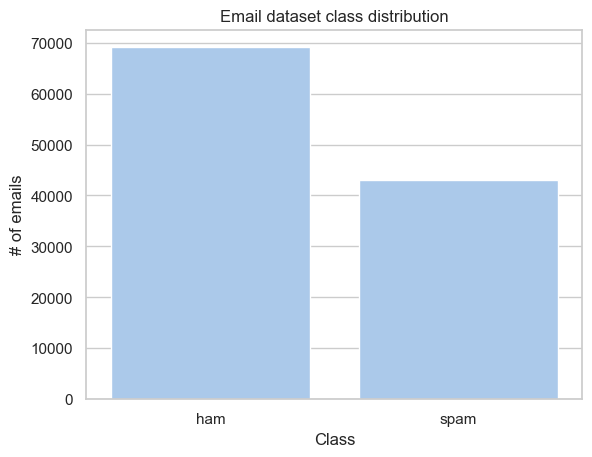

In [37]:
# Class distribution by bar plot
sns.countplot(x = "label", data = df)
plt.title("Email dataset class distribution")
plt.xlabel("Class")
plt.ylabel("# of emails")
plt.show()

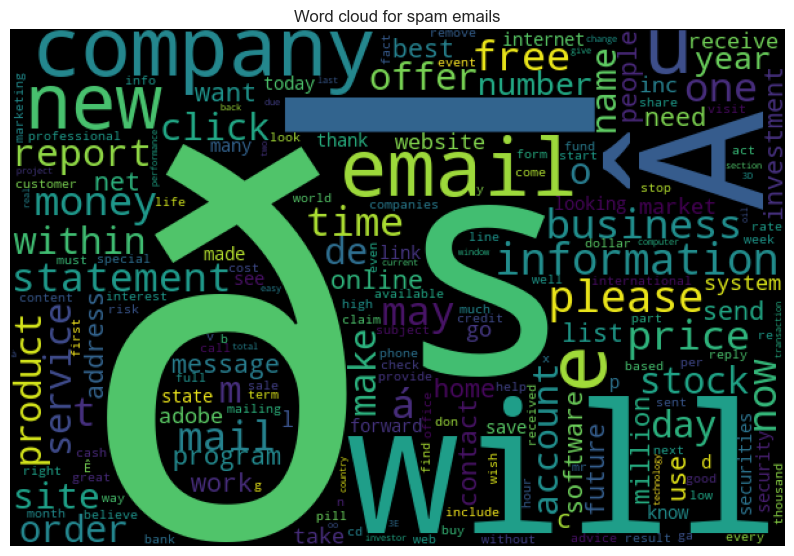

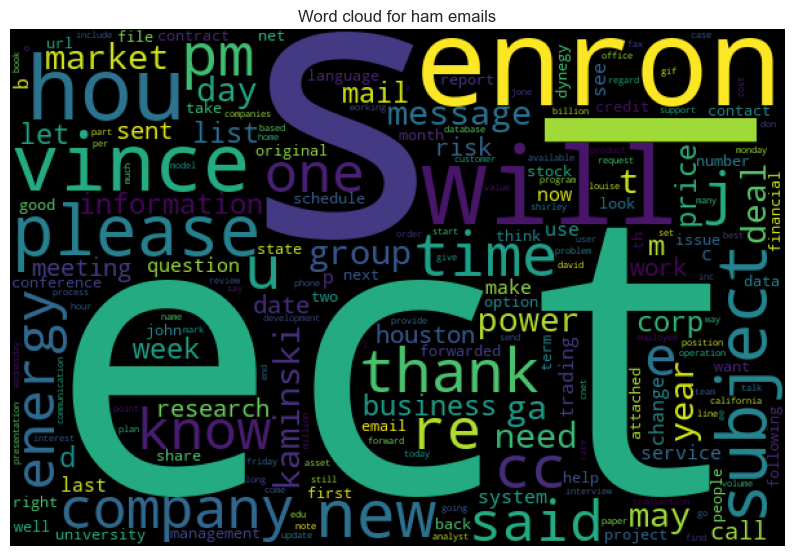

In [38]:
from wordcloud import WordCloud

# Word cloud for spam emails
spamWordsUnique = " ".join(df[df["label"] == "spam"]["text"])
spamWordCloud = WordCloud(width = 600, height = 400, collocations = False).generate(spamWordsUnique)
plt.figure(figsize = (10, 8))
plt.imshow(spamWordCloud)
plt.title("Word cloud for spam emails")
plt.axis("off")
plt.show()

# Word cloud for ham emails
spamWordsUnique = " ".join(df[df["label"] == "ham"]["text"])
hamWordCloud = WordCloud(width = 600, height = 400, collocations = False).generate(spamWordsUnique)
plt.figure(figsize = (10, 8))
plt.imshow(hamWordCloud)
plt.title("Word cloud for ham emails")
plt.axis("off")
plt.show()

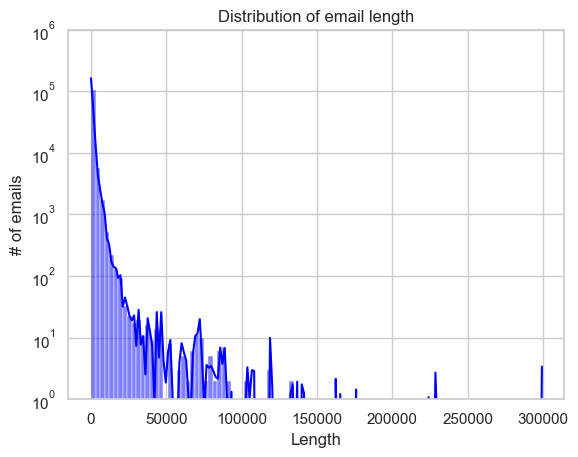

In [39]:
# Set seaborn style and color palette
sns.set(style="whitegrid", palette="pastel")

# Distribution of email length
df["length"] = df["text"].apply(len)
sns.histplot(data=df, x="length", bins=100, kde=True, color="blue")
plt.title("Distribution of email length")
plt.xlabel("Length")
plt.ylabel("# of emails")
plt.yscale("log")       # Logarithmic scale becausae email distribution is skewed a lot
plt.ylim(1, 1e6)
plt.show()

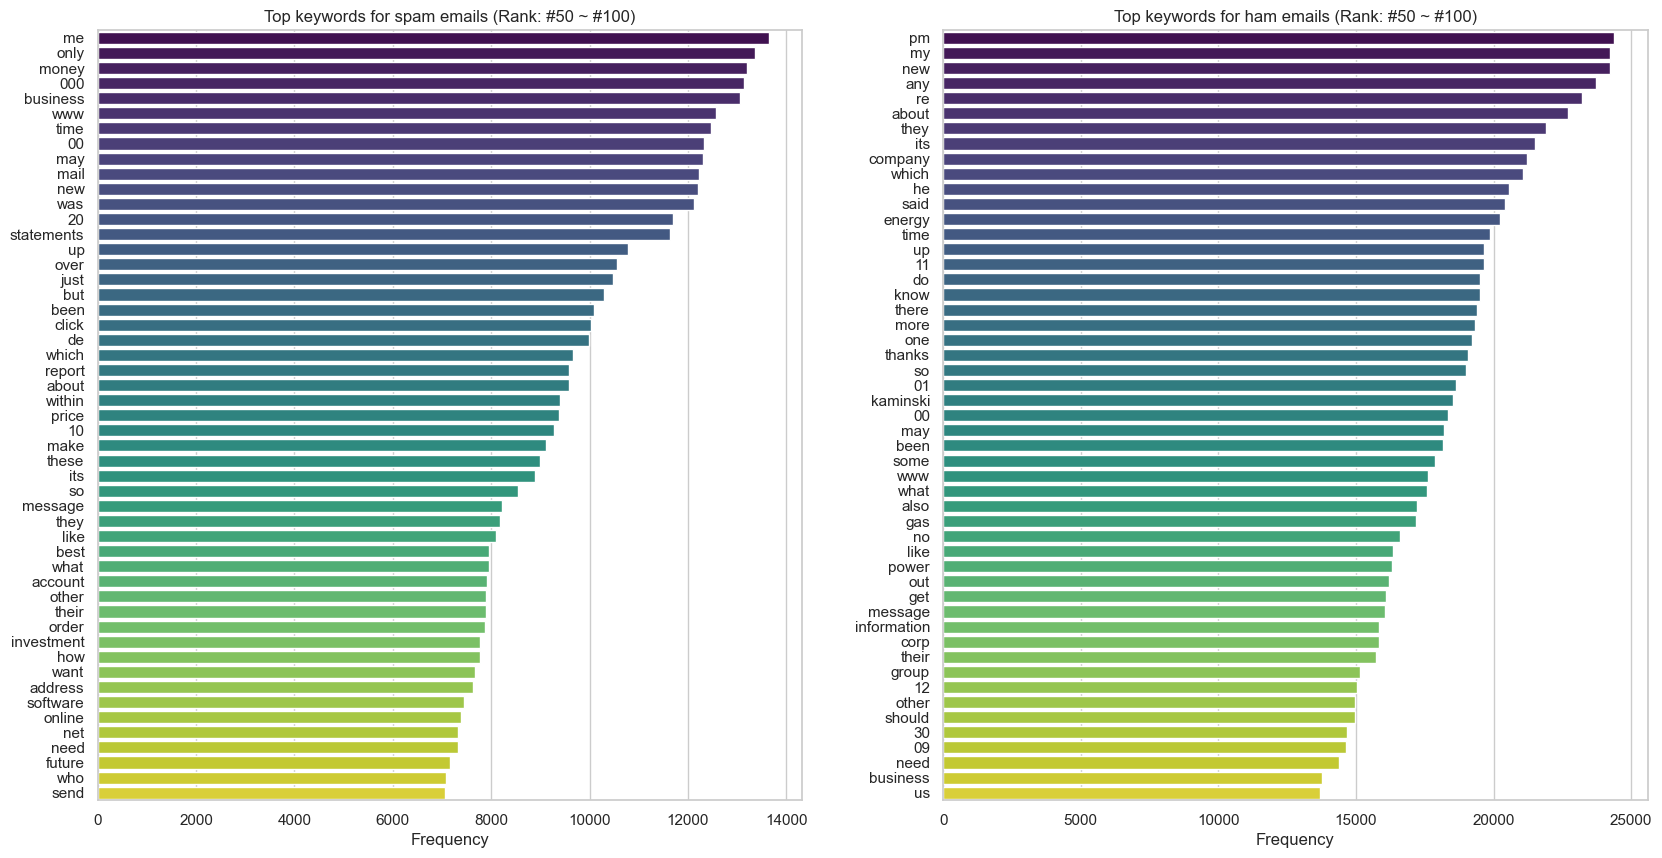

In [40]:
# Top ngram keywords for spam emails
from sklearn.feature_extraction.text import CountVectorizer

def getTopNGrams(text: pd.Series, n: int,  start: int, end: int):
    vec = CountVectorizer(ngram_range=(n, n)).fit(text)
    bagOfWords = vec.transform(text)
    sumOfWords = bagOfWords.sum(axis=0)
    wordsFrequency = [(word, sumOfWords[0, idx]) for word, idx in vec.vocabulary_.items()]
    wordsFrequency = sorted(wordsFrequency, key=lambda x: x[1], reverse=True)
    return wordsFrequency[start-1:end]

ngramCount = 1
rankSearchLimitStart = 50
rankSearchLimitEnd = 100

# spam emails
topNgrams = getTopNGrams(df[df["label"] == "spam"]["text"], ngramCount, rankSearchLimitStart, rankSearchLimitEnd)
topNgrams = dict(topNgrams)

# ham emails
topNgrams_ham = getTopNGrams(df[df["label"] == "ham"]["text"], ngramCount, rankSearchLimitStart, rankSearchLimitEnd)
topNgrams_ham = dict(topNgrams_ham)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

sns.barplot(x=list(topNgrams.values()), y=list(topNgrams.keys()), hue=list(topNgrams.keys()), palette="viridis", legend=False, ax=ax1)
ax1.set_title(f"Top keywords for spam emails (Rank: #{rankSearchLimitStart} ~ #{rankSearchLimitEnd})")
ax1.set_xlabel("Frequency")

sns.barplot(x=list(topNgrams_ham.values()), y=list(topNgrams_ham.keys()), hue=list(topNgrams_ham.keys()), palette="viridis", legend=False, ax=ax2)
ax2.set_title(f"Top keywords for ham emails (Rank: #{rankSearchLimitStart} ~ #{rankSearchLimitEnd})")
ax2.set_xlabel("Frequency")

plt.show()

In [41]:
# Extract the top 10 most frequent words for spam and ham emails
topWords = getTopNGrams(df["text"], 1, 1, 10)
topWords = dict(topWords)
print(topWords)

{'the': 723175, 'to': 533033, 'and': 393928, 'of': 374821, 'in': 266456, 'you': 220187, 'for': 214402, 'is': 186728, 'on': 155102, 'this': 153889}


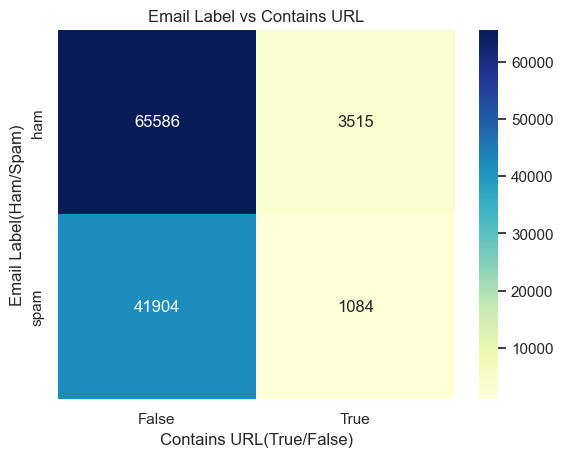

In [42]:
# URL detection for ham/spam emails and their distribution
import re

def detectURL(text:str) -> bool:
    # Regular expression to detect URLs
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return bool(url_pattern.search(text))

df['contains_url'] = df['text'].apply(detectURL)

# Create a cross-tabulation of labels and URL existence
crosstab = pd.crosstab(df['label'], df['contains_url'])

# Create the heatmap
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')

# Set the axis labels and title
plt.xlabel("Contains URL(True/False)")
plt.ylabel("Email Label(Ham/Spam)")
plt.title("Email Label vs Contains URL")

# Show the plot
plt.show()